# Mouse AD model

In [1]:
%config InlineBackend.figure_formats = ['retina']  # increase resolution on retina screens

In [2]:
import scanpy as sc
import numpy as np
import pandas as pd
import scipy as sp
import joblib
from pyannotables import tables
import anndata
import sys

import matplotlib.pyplot as plt

from plotnine import *
from harmony import harmonize

In [3]:
sys.path.append('/home/gokcen/Code/sctoolkit/')

In [4]:
from sctoolkit.utils import run_spring, dotplot_spring
from sctoolkit.proportions import plot_proportion_barplot

In [5]:
sc.set_figure_params(dpi=100)

In [14]:
ad_human = sc.read('../AtopicDermatitis.h5ad')

In [15]:
ad_human.uns['disease_lesional_colors']

array(['#279e68', '#1f77b4', '#ff7f0e'], dtype=object)

In [16]:
ctg2ct = ad_human.obs[['Cell type', 'Cell type granular']].drop_duplicates().set_index('Cell type granular')['Cell type'].to_dict()

In [7]:
ad1 = sc.read('/home/gokcen/work/efiskin-mouse/outputs/anndata/adata-sample-mouse-control.h5ad')
ad2 = sc.read('/home/gokcen/work/efiskin-mouse/outputs/anndata/adata-sample-mouse-inflamed.h5ad')

ad = sc.concat([ad1, ad2], join='outer', label='status', keys=['control', 'inflamed'])
ad

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


AnnData object with n_obs × n_vars = 9133 × 18782
    obs: '10x_cell_calling', 'sample_name', 'raw', 'status', 'empty_drops_FDR', 'neg_log10_empty_drops_FDR', 'n_umis', 'n_genes', 'log10_n_umis', 'log10_n_genes', 'barcode_rank', 'mt_frac', 'n_counts', 'scrublet', 'scrublet_score', 'predicted_sex', 'S_score', 'G2M_score', 'phase', 'leiden'
    obsm: 'X_diffmap', 'X_pca', 'X_umap'
    layers: 'counts'

In [19]:
from harmony import harmonize

In [ ]:
del ad.obsm['X_diffmap']

In [21]:
%%time

sc.pp.highly_variable_genes(ad, n_top_genes=2000)
sc.pp.pca(ad)

ad.obsm['X_harmony'] = harmonize(ad.obsm['X_pca'], ad.obs, 'status')
sc.pp.neighbors(ad, use_rep='X_harmony')
sc.tl.umap(ad)


	Initialization is completed.
	Completed 1 / 10 iteration(s).
	Completed 2 / 10 iteration(s).
	Completed 3 / 10 iteration(s).
	Completed 4 / 10 iteration(s).
	Completed 5 / 10 iteration(s).
	Completed 6 / 10 iteration(s).
Reach convergence after 6 iteration(s).
CPU times: user 2min 5s, sys: 4.32 s, total: 2min 9s
Wall time: 29.7 s


In [17]:
ad.uns['status_colors'] = ad_human.uns['disease_lesional_colors'][[0, -1]]

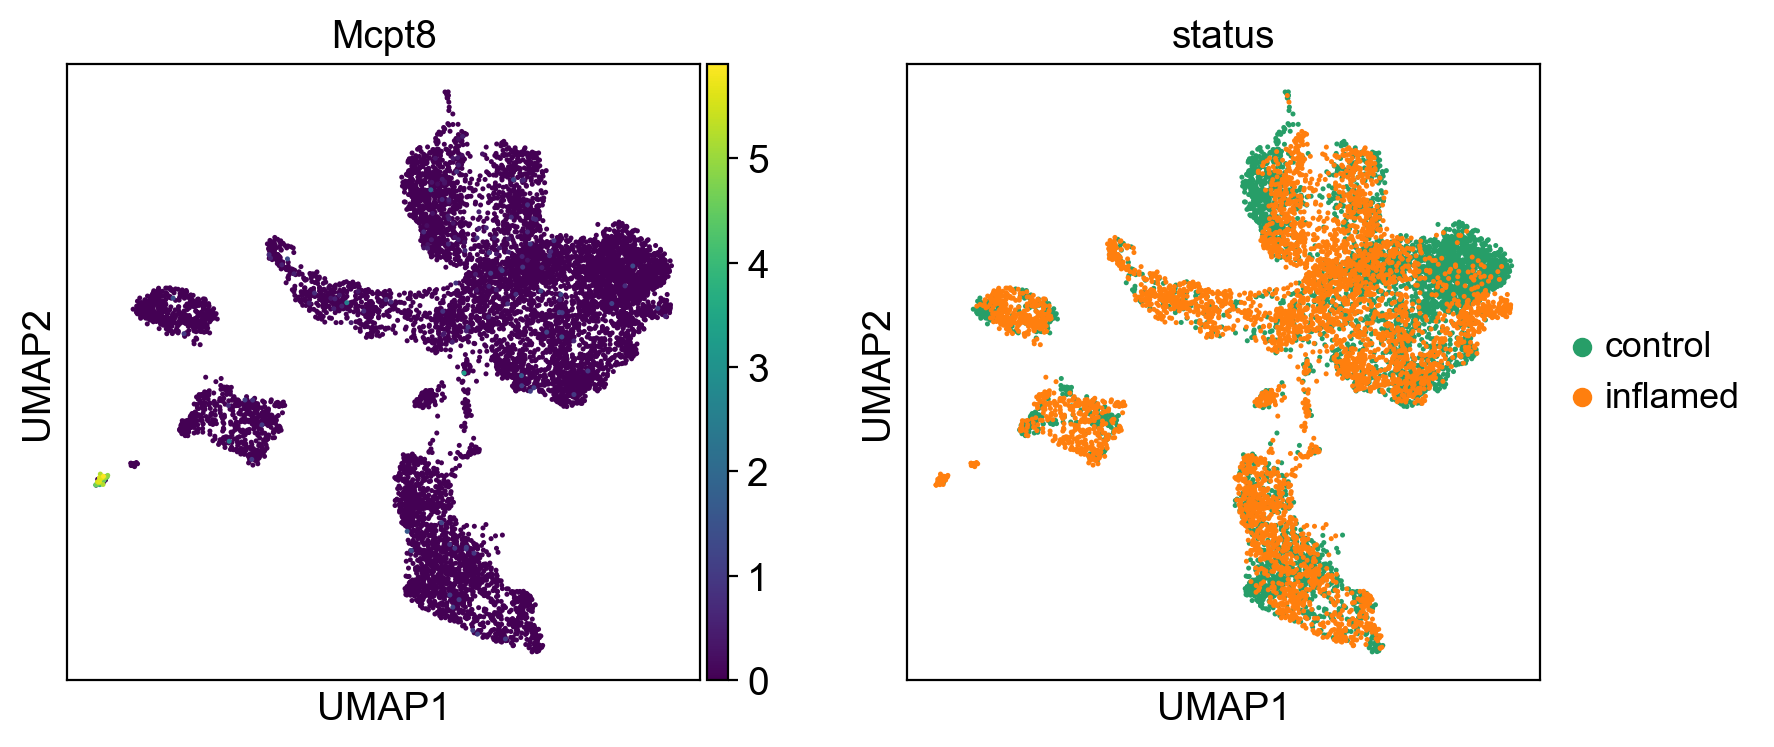

In [37]:
#f, ax = plt.subplots(figsize=(10,10))

sc.pl.umap(ad, color=['Mcpt8', 'status'])

In [250]:
sc.tl.leiden(ad, resolution=1.5)

In [252]:
sc.tl.leiden(ad, restrict_to=('leiden', ['21']), key_added='leiden_sub', resolution=0.3)

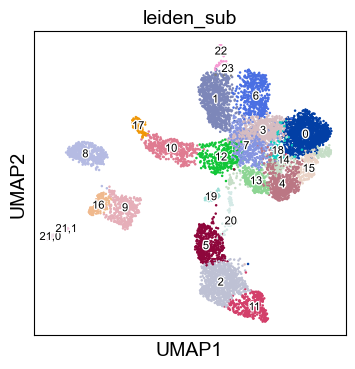

In [253]:
sc.pl.umap(ad, color='leiden_sub', legend_fontoutline=2, legend_fontsize=8, legend_fontweight='normal', legend_loc='on data')

In [296]:
ad.obs_names = ad.obs_names + '-' + ad.obs.status.astype(str)

In [297]:
ad.write('Mouse-harmonized-with-baso.h5ad')

In [6]:
ad = sc.read('Mouse-harmonized-with-baso.h5ad')

In [7]:
ad.obs

10x_cell_calling     sample_name   raw    status  \
AAACCTGAGATCCCGC-1-control               True   mouse-control  True   control   
AAACCTGAGGTAGCCA-1-control               True   mouse-control  True   control   
AAACCTGAGTTAGCGG-1-control               True   mouse-control  True   control   
AAACCTGCAATGAAAC-1-control               True   mouse-control  True   control   
AAACCTGGTAATCGTC-1-control               True   mouse-control  True   control   
...                                       ...             ...   ...       ...   
TTTGTCAAGCAATCTC-1-inflamed              True  mouse-inflamed  True  inflamed   
TTTGTCAGTAGCACGA-1-inflamed             False  mouse-inflamed  True  inflamed   
TTTGTCAGTCCGTTAA-1-inflamed              True  mouse-inflamed  True  inflamed   
TTTGTCATCAAACGGG-1-inflamed             False  mouse-inflamed  True  inflamed   
TTTGTCATCTACTTAC-1-inflamed             False  mouse-inflamed  True  inflamed   

                             empty_drops_FDR  neg_log10_empty_drops_FDR  \
AAACCTGAGATCCCGC-1-control          0.000000                   4.000000   
AAACCTGAGGTAGCCA-1-control          0.000000                   4.000000   
AAACCTGAGTTAGCGG-1-control          0.000000                   4.000000   
AAACCTGCAATGAAAC-1-control          0.000000                   4.000000   
AAACCTGGTAATCGTC-1-control          0.000000                   4.000000   
...                                      ...                        ...   
TTTGTCAAGCAATCTC-1-inflamed         0.000000                   4.000000   
TTTGTCAGTAGCACGA-1-inflamed         0.000323                   3.491053   
TTTGTCAGTCCGTTAA-1-inflamed         0.000000                   4.000000   
TTTGTCATCAAACGGG-1-inflamed         0.000000                   4.000000   
TTTGTCATCTACTTAC-1-inflamed         0.000000                   4.000000   

                             n_umis  n_genes  log10_n_umis  log10_n_genes  \
AAACCTGAGATCCCGC-1-control   9474.0     2315      3.976533       3.364551   
AAACCTGAGGTAGCCA-1-control   3273.0     1179      3.514946       3.071514   
AAACCTGAGTTAGCGG-1-control   9606.0     2146      3.982543       3.331630   
AAACCTGCAATGAAAC-1-control   2786.0     1061      3.444981       3.025715   
AAACCTGGTAATCGTC-1-control   9886.0     2405      3.995021       3.381115   
...                             ...      ...           ...            ...   
TTTGTCAAGCAATCTC-1-inflamed  8140.0     2427      3.910625       3.385070   
TTTGTCAGTAGCACGA-1-inflamed   333.0      238      2.522444       2.376577   
TTTGTCAGTCCGTTAA-1-inflamed  9111.0     2421      3.959566       3.383995   
TTTGTCATCAAACGGG-1-inflamed  2746.0     1129      3.438700       3.052694   
TTTGTCATCTACTTAC-1-inflamed  1513.0      676      3.179839       2.829947   

                             ...  scrublet  scrublet_score  predicted_sex  \
AAACCTGAGATCCCGC-1-control   ...     False        0.174672         female   
AAACCTGAGGTAGCCA-1-control   ...     False        0.256637         female   
AAACCTGAGTTAGCGG-1-control   ...     False        0.111465         female   
AAACCTGCAATGAAAC-1-control   ...     False        0.049746         female   
AAACCTGGTAATCGTC-1-control   ...     False        0.203931         female   
...                          ...       ...             ...            ...   
TTTGTCAAGCAATCTC-1-inflamed  ...     False        0.054583         female   
TTTGTCAGTAGCACGA-1-inflamed  ...     False        0.070423           male   
TTTGTCAGTCCGTTAA-1-inflamed  ...     False        0.058698         female   
TTTGTCATCAAACGGG-1-inflamed  ...     False        0.012266         female   
TTTGTCATCTACTTAC-1-inflamed  ...     False        0.028571         female   

                              S_score  G2M_score phase  leiden  leiden_sub  \
AAACCTGAGATCCCGC-1-control  -0.060792  -0.143066    G1       1           1   
AAACCTGAGGTAGCCA-1-control  -0.071798  -0.100837    G1       4           4   
AAACCTGAGTTAGCGG-1-control  -0.095990  -0.122406    G1      10         

In [303]:
ad_sub.obs_names = ad_sub.obs_names + '-' + ad_sub.obs.status.astype(str)

In [304]:
ad.obs['Cell type preds'] = ad_sub.obs['Cell type']
ad.obs['Cell type granular preds'] = ad_sub.obs['Cell type granular']

In [321]:
ad.write('Mouse-harmonized-with-baso.h5ad')

## Spring

In [307]:
ad = sc.read('Mouse-harmonized-with-baso.h5ad')
ad

AnnData object with n_obs × n_vars = 9133 × 18782
    obs: '10x_cell_calling', 'sample_name', 'raw', 'status', 'empty_drops_FDR', 'neg_log10_empty_drops_FDR', 'n_umis', 'n_genes', 'log10_n_umis', 'log10_n_genes', 'barcode_rank', 'mt_frac', 'n_counts', 'scrublet', 'scrublet_score', 'predicted_sex', 'S_score', 'G2M_score', 'phase', 'leiden', 'leiden_sub', 'Cell type preds', 'Cell type granular preds'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'leiden_colors', 'leiden_sub_colors', 'neighbors', 'pca', 'status_colors', 'umap'
    obsm: 'X_harmony', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [322]:
run_spring(ad, 'leiden_sub');

  0%|          | 0/26 [00:00<?, ?it/s]

In [ ]:
dotplot_spring(ad, 'leiden_sub', mean_only_expressed=True, use_raw=False, standard_scale='var')

In [ ]:
pd.crosstab(ad.obs['Cell type granular preds'], ad.obs.leiden_sub)

In [72]:
final_coarse_annotations = '''0	KC
1	KC
2	FB
3	KC
4	KC
5	FB
6	KC
7	KC
8	T/NK
9	Macrophage/DC
10	KC
11	FB
12	KC
13	KC
14	KC
15	KC
16	Macrophage/DC
17	KC
18	KC
19	Melanocyte
20,0	Pericyte/SMC
20,1	LEC
21,0	Basophil
21,1	Neutrophil
22	Cornified KC
23	KC'''

final_coarse_annotations = {x.split('\t')[0]:x.split('\t')[1] for x in final_coarse_annotations.split('\n')}
final_coarse_annotations

{'0': 'KC',
 '1': 'KC',
 '2': 'FB',
 '3': 'KC',
 '4': 'KC',
 '5': 'FB',
 '6': 'KC',
 '7': 'KC',
 '8': 'T/NK',
 '9': 'Macrophage/DC',
 '10': 'KC',
 '11': 'FB',
 '12': 'KC',
 '13': 'KC',
 '14': 'KC',
 '15': 'KC',
 '16': 'Macrophage/DC',
 '17': 'KC',
 '18': 'KC',
 '19': 'Melanocyte',
 '20,0': 'Pericyte/SMC',
 '20,1': 'LEC',
 '21,0': 'Basophil',
 '21,1': 'Neutrophil',
 '22': 'Cornified KC',
 '23': 'KC'}

In [73]:
ad.obs['Cell type'] = ad.obs.leiden_sub.map(final_coarse_annotations)

In [74]:
%matplotlib inline

... storing 'Cell type' as categorical


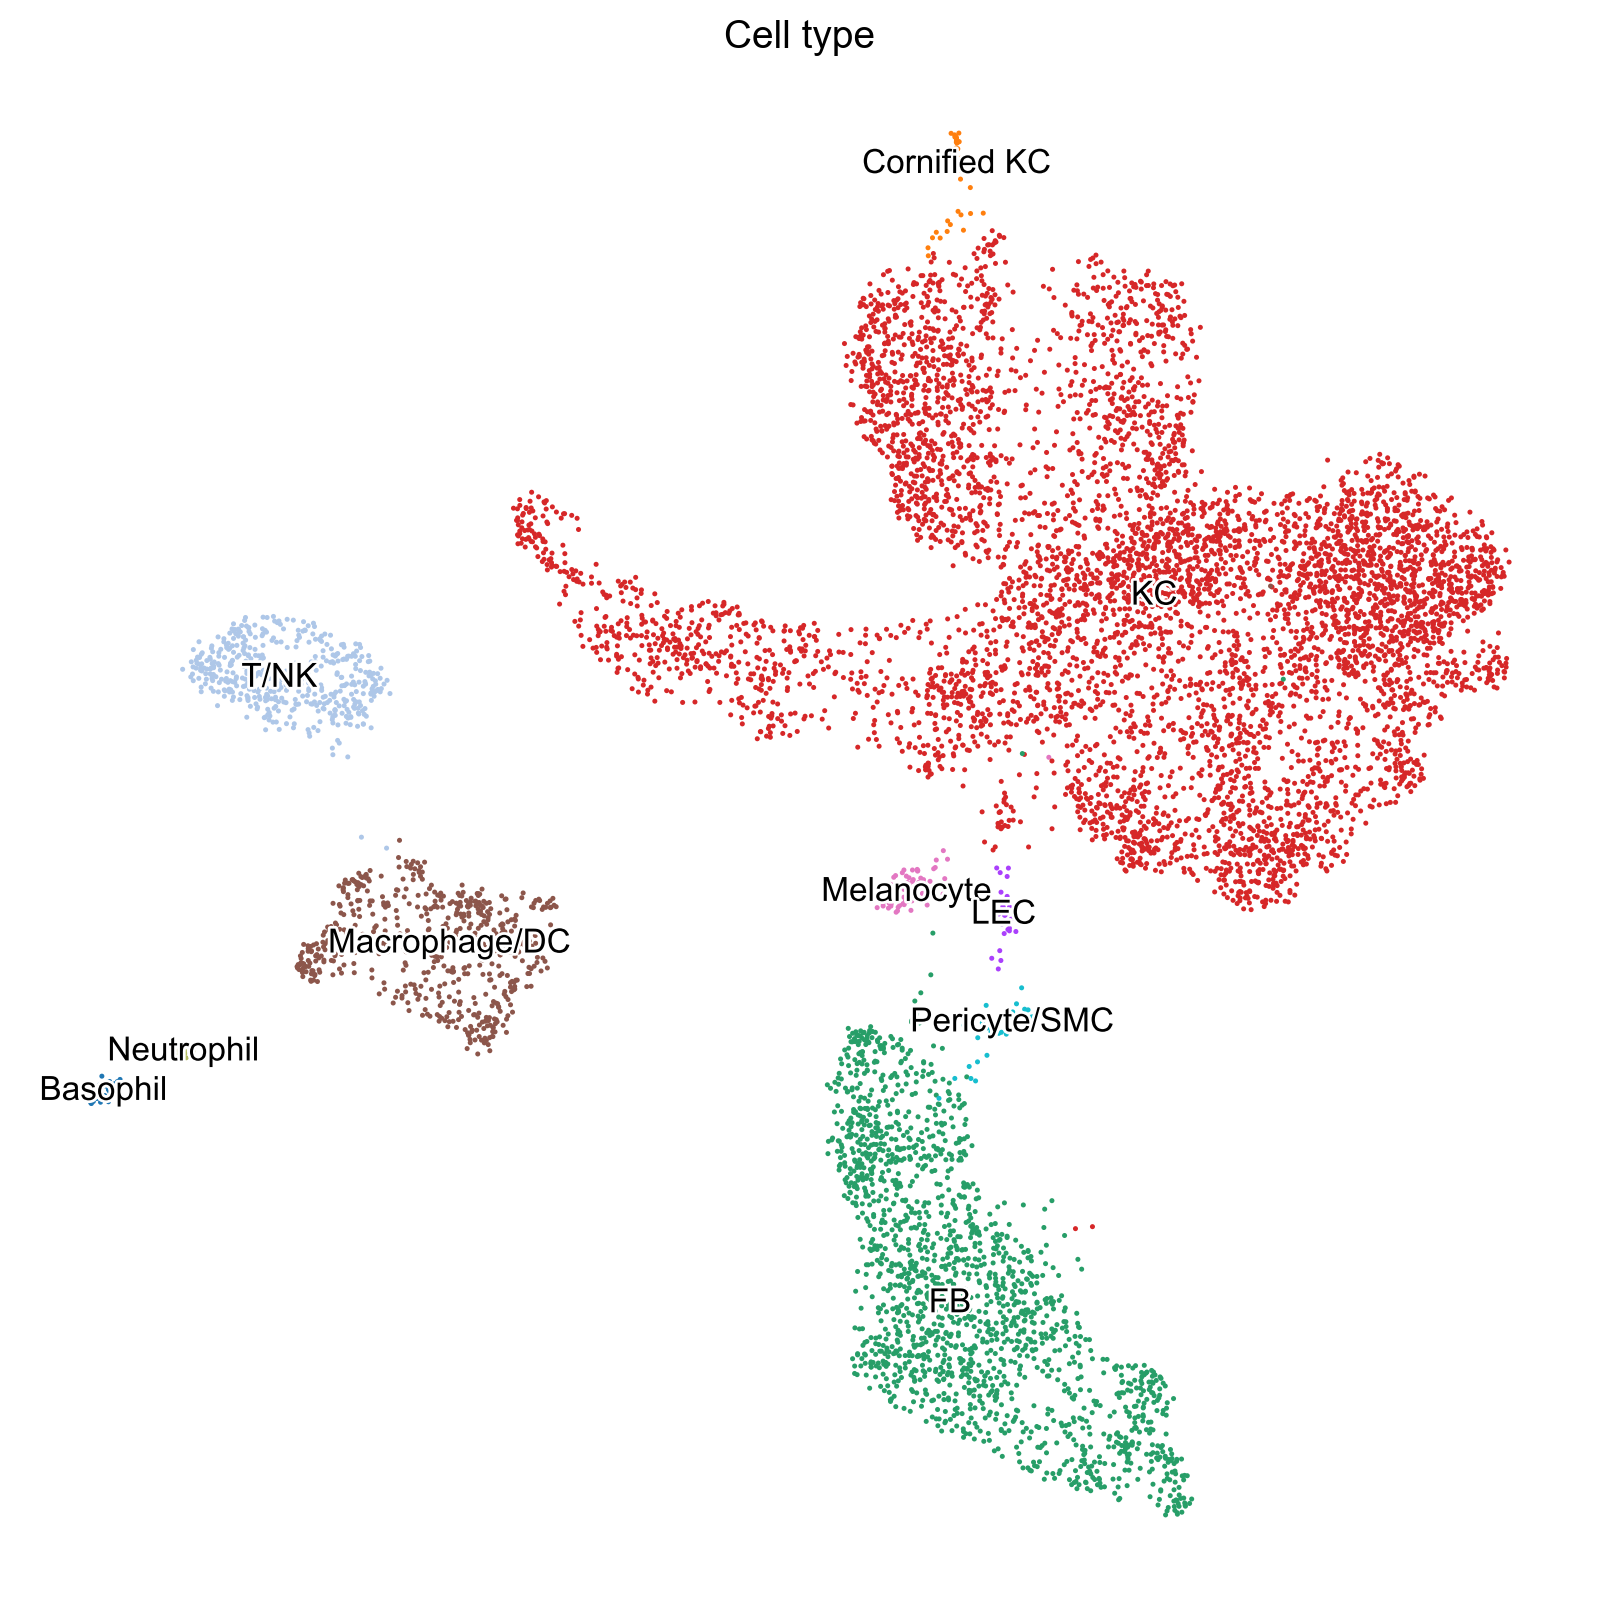

In [75]:
f, ax = plt.subplots(figsize=(10,10))

sc.pl.umap(ad, color='Cell type', ax=ax, legend_loc='on data', legend_fontoutline=2, legend_fontsize=12, legend_fontweight='normal', frameon=False, save='-coarse-annotations.pdf', show=True)

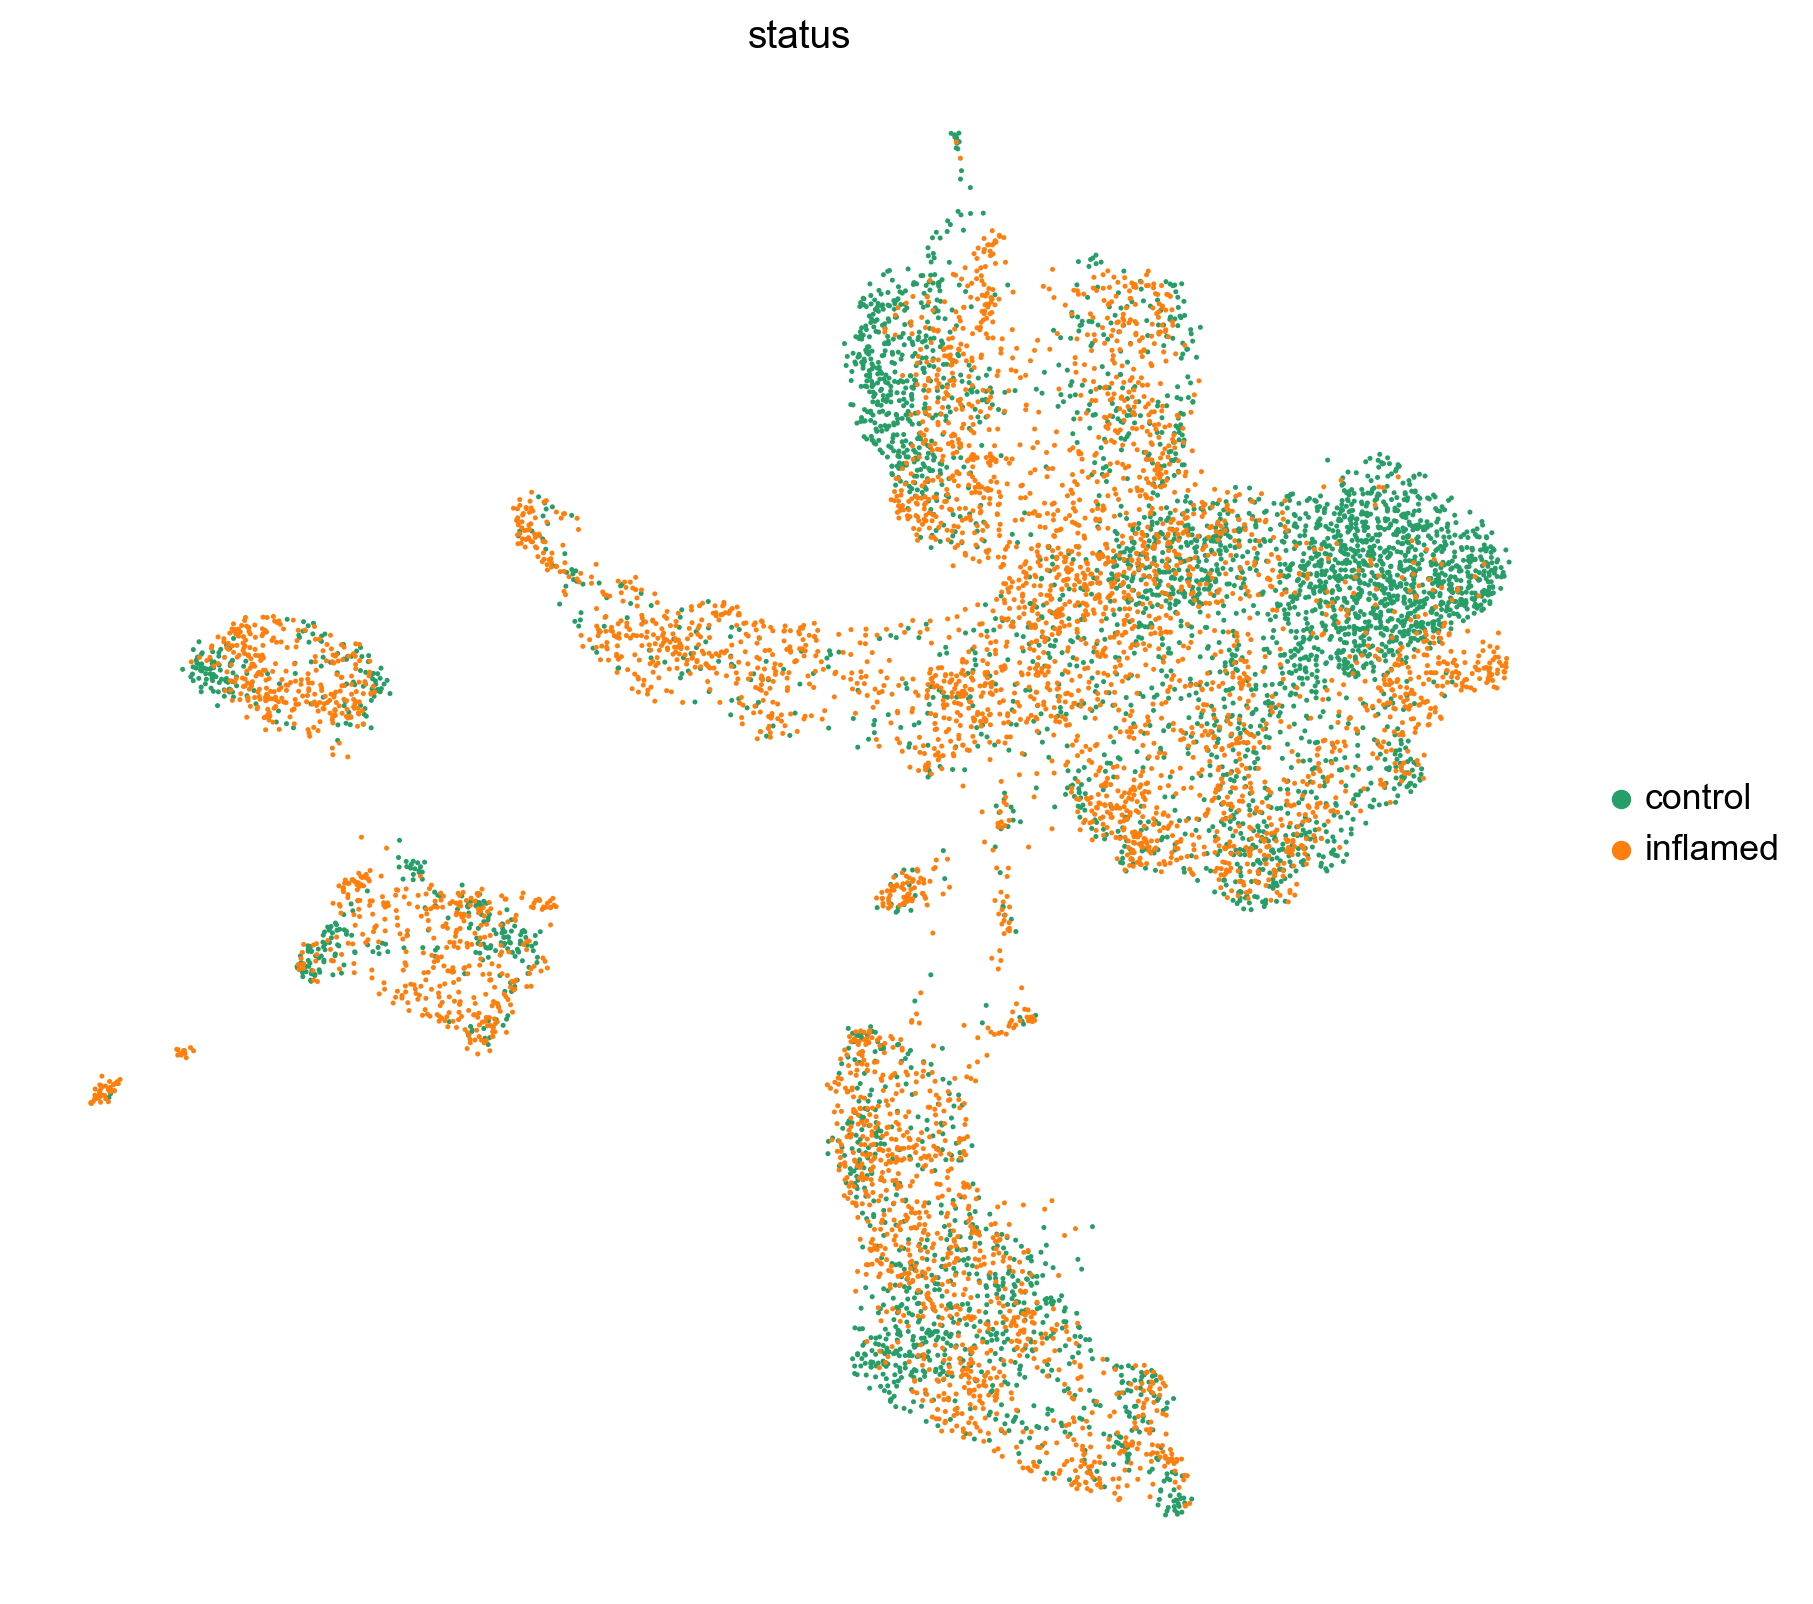

In [76]:
f, ax = plt.subplots(figsize=(10,10))

sc.pl.umap(ad, color='status', ax=ax, frameon=False, save='-disease-status.pdf', show=True)

In [77]:
ad.write('Mouse-harmonized-with-baso.h5ad')

In [68]:
ad.obs

10x_cell_calling     sample_name   raw    status  \
AAACCTGAGATCCCGC-1-control               True   mouse-control  True   control   
AAACCTGAGGTAGCCA-1-control               True   mouse-control  True   control   
AAACCTGAGTTAGCGG-1-control               True   mouse-control  True   control   
AAACCTGCAATGAAAC-1-control               True   mouse-control  True   control   
AAACCTGGTAATCGTC-1-control               True   mouse-control  True   control   
...                                       ...             ...   ...       ...   
TTTGTCAAGCAATCTC-1-inflamed              True  mouse-inflamed  True  inflamed   
TTTGTCAGTAGCACGA-1-inflamed             False  mouse-inflamed  True  inflamed   
TTTGTCAGTCCGTTAA-1-inflamed              True  mouse-inflamed  True  inflamed   
TTTGTCATCAAACGGG-1-inflamed             False  mouse-inflamed  True  inflamed   
TTTGTCATCTACTTAC-1-inflamed             False  mouse-inflamed  True  inflamed   

                             empty_drops_FDR  neg_log10_empty_drops_FDR  \
AAACCTGAGATCCCGC-1-control          0.000000                   4.000000   
AAACCTGAGGTAGCCA-1-control          0.000000                   4.000000   
AAACCTGAGTTAGCGG-1-control          0.000000                   4.000000   
AAACCTGCAATGAAAC-1-control          0.000000                   4.000000   
AAACCTGGTAATCGTC-1-control          0.000000                   4.000000   
...                                      ...                        ...   
TTTGTCAAGCAATCTC-1-inflamed         0.000000                   4.000000   
TTTGTCAGTAGCACGA-1-inflamed         0.000323                   3.491053   
TTTGTCAGTCCGTTAA-1-inflamed         0.000000                   4.000000   
TTTGTCATCAAACGGG-1-inflamed         0.000000                   4.000000   
TTTGTCATCTACTTAC-1-inflamed         0.000000                   4.000000   

                             n_umis  n_genes  log10_n_umis  log10_n_genes  \
AAACCTGAGATCCCGC-1-control   9474.0     2315      3.976533       3.364551   
AAACCTGAGGTAGCCA-1-control   3273.0     1179      3.514946       3.071514   
AAACCTGAGTTAGCGG-1-control   9606.0     2146      3.982543       3.331630   
AAACCTGCAATGAAAC-1-control   2786.0     1061      3.444981       3.025715   
AAACCTGGTAATCGTC-1-control   9886.0     2405      3.995021       3.381115   
...                             ...      ...           ...            ...   
TTTGTCAAGCAATCTC-1-inflamed  8140.0     2427      3.910625       3.385070   
TTTGTCAGTAGCACGA-1-inflamed   333.0      238      2.522444       2.376577   
TTTGTCAGTCCGTTAA-1-inflamed  9111.0     2421      3.959566       3.383995   
TTTGTCATCAAACGGG-1-inflamed  2746.0     1129      3.438700       3.052694   
TTTGTCATCTACTTAC-1-inflamed  1513.0      676      3.179839       2.829947   

                             ...  scrublet  scrublet_score  predicted_sex  \
AAACCTGAGATCCCGC-1-control   ...     False        0.174672         female   
AAACCTGAGGTAGCCA-1-control   ...     False        0.256637         female   
AAACCTGAGTTAGCGG-1-control   ...     False        0.111465         female   
AAACCTGCAATGAAAC-1-control   ...     False        0.049746         female   
AAACCTGGTAATCGTC-1-control   ...     False        0.203931         female   
...                          ...       ...             ...            ...   
TTTGTCAAGCAATCTC-1-inflamed  ...     False        0.054583         female   
TTTGTCAGTAGCACGA-1-inflamed  ...     False        0.070423           male   
TTTGTCAGTCCGTTAA-1-inflamed  ...     False        0.058698         female   
TTTGTCATCAAACGGG-1-inflamed  ...     False        0.012266         female   
TTTGTCATCTACTTAC-1-inflamed  ...     False        0.028571         female   

                              S_score  G2M_score phase  leiden  leiden_sub  \
AAACCTGAGATCCCGC-1-control  -0.060792  -0.143066    G1       1           1   
AAACCTGAGGTAGCCA-1-control  -0.071798  -0.100837    G1       4           4   
AAACCTGAGTTAGCGG-1-control  -0.095990  -0.122406    G1      10         

In [346]:
run_spring(ad, 'Cell type');

  0%|          | 0/10 [00:00<?, ?it/s]

In [352]:
ad_human.obs['Cell type'].cat.categories

Index(['Keratinocytes', 'Cornified keratinocytes', 'Sweat gland',
       'Fibroblasts', 'Pericyte/SMC', 'VEC', 'LEC', 'Melanocytes', 'Schwann',
       'DC', 'Macrophages', 'Neutrophils', 'Mast', 'B cells', 'Plasma',
       'T/NK'],
      dtype='object')

In [69]:
ad.obs['Cell type preds'].cat.categories

Index(['Keratinocytes', 'Cornified keratinocytes', 'Sweat gland',
       'Fibroblasts', 'Pericyte/SMC', 'LEC', 'Melanocytes', 'DC',
       'Macrophages', 'Neutrophils', 'B cells', 'T/NK'],
      dtype='object')

In [ ]:
ad.obs['Cell type'].cat.reorder_categories(['KC', 'Cornified KC', 'FB', 'Pericyte/SMC', 'LEC', 'Melanocyte', 'Macrophage/DC', 'Basophil', 'Neutrophil', 'T/NK'], inplace=True)

In [369]:
%matplotlib inline

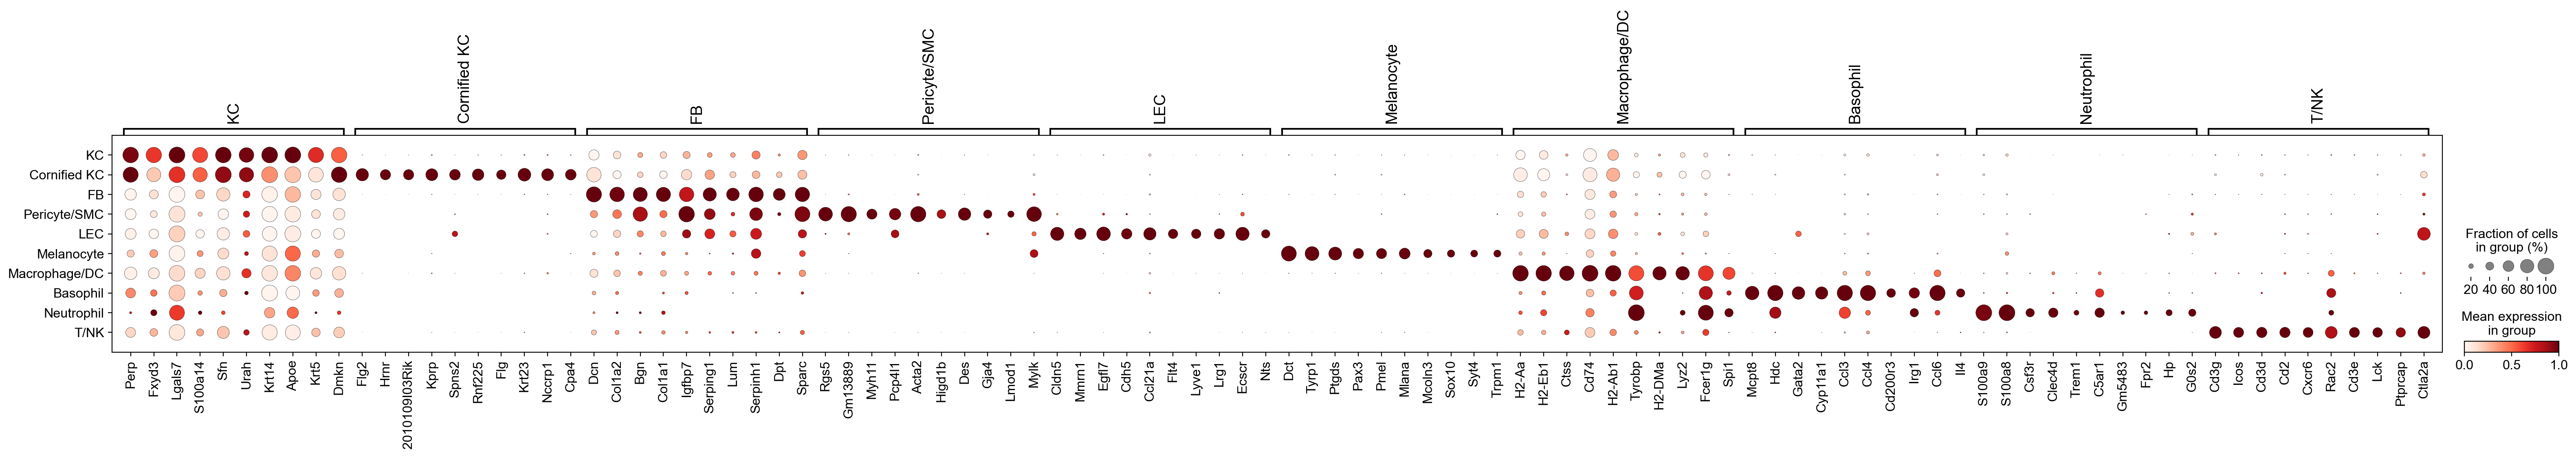

In [370]:
dotplot_spring(ad, 'Cell type', mean_only_expressed=True, use_raw=False, standard_scale='var', save='coarse-annotations.pdf', show=True)

## KC object

In [9]:
kera = ad[ad.obs.leiden_sub.isin(['0', '1', '22', '23'])].copy()
kera

AnnData object with n_obs × n_vars = 2251 × 18782
    obs: '10x_cell_calling', 'sample_name', 'raw', 'status', 'empty_drops_FDR', 'neg_log10_empty_drops_FDR', 'n_umis', 'n_genes', 'log10_n_umis', 'log10_n_genes', 'barcode_rank', 'mt_frac', 'n_counts', 'scrublet', 'scrublet_score', 'predicted_sex', 'S_score', 'G2M_score', 'phase', 'leiden', 'leiden_sub', 'Cell type preds', 'Cell type granular preds'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'leiden_sub_colors', 'neighbors', 'pca', 'status_colors', 'umap'
    obsm: 'X_harmony', 'X_pca', 'X_umap'
    varm: 'PCs', 'spring_leiden_sub'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [13]:
%%time

sc.pp.highly_variable_genes(kera, n_top_genes=1000)
sc.pp.pca(kera)

kera.obsm['X_harmony'] = harmonize(kera.obsm['X_pca'], kera.obs, 'status')
sc.pp.neighbors(kera, use_rep='X_harmony')
sc.tl.umap(kera)

	Initialization is completed.
	Completed 1 / 10 iteration(s).
	Completed 2 / 10 iteration(s).
Reach convergence after 2 iteration(s).
CPU times: user 39.6 s, sys: 275 ms, total: 39.9 s
Wall time: 20.1 s


In [14]:
sc.tl.leiden(kera, resolution=1.5)

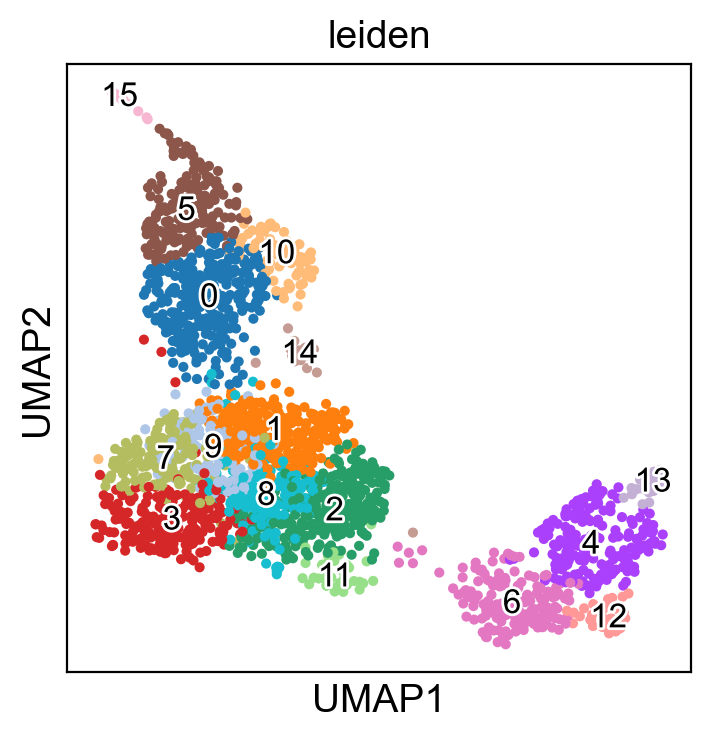

In [15]:
sc.pl.umap(kera, color='leiden', legend_loc='on data', legend_fontoutline=2, legend_fontsize=12, legend_fontweight='normal')

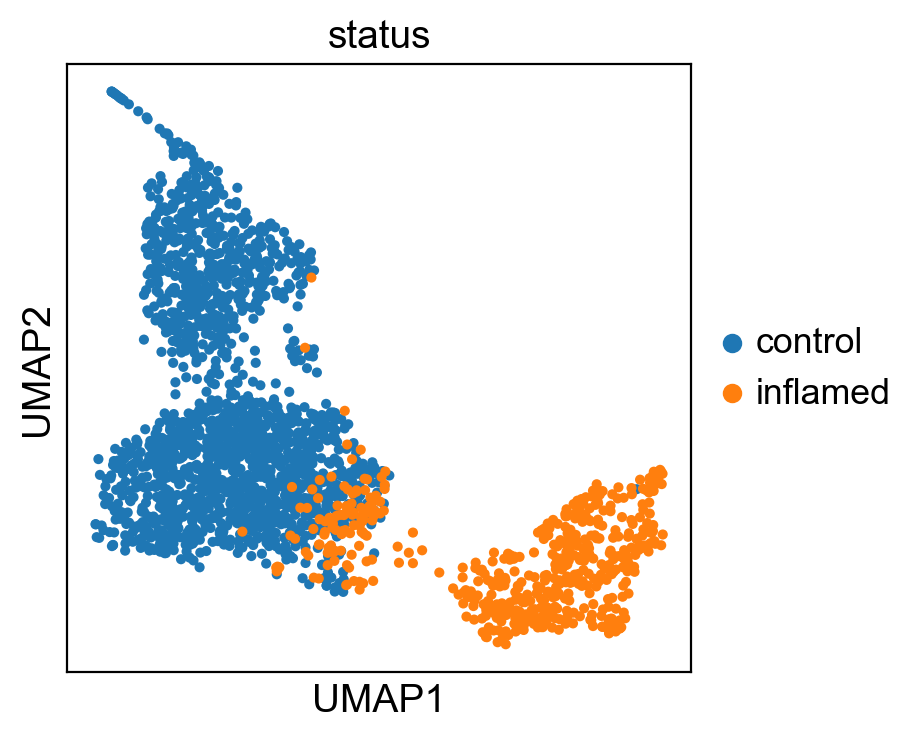

In [16]:
sc.pl.umap(kera, color='status')

In [ ]:
kera.obs['Cell type'] = ad.obs['Cell type']
kera.obs['Cell type'].cat.remove_unused_categories(inplace=True)

In [19]:
kera_inf = kera[kera.obs.status == 'control'].copy()

In [20]:
%%time

sc.pp.highly_variable_genes(kera_inf, n_top_genes=1000)
sc.pp.pca(kera_inf)

#kera_inf.obsm['X_harmony'] = harmonize(kera_inf.obsm['X_pca'], kera_inf.obs, 'status')
sc.pp.neighbors(kera_inf)
sc.tl.umap(kera_inf)

CPU times: user 4.26 s, sys: 18.6 ms, total: 4.28 s
Wall time: 4.27 s


In [25]:
kera_inf.layers['scaled'] = kera_inf.X.copy()
sc.pp.scale(kera_inf, max_value=10, layer='scaled')

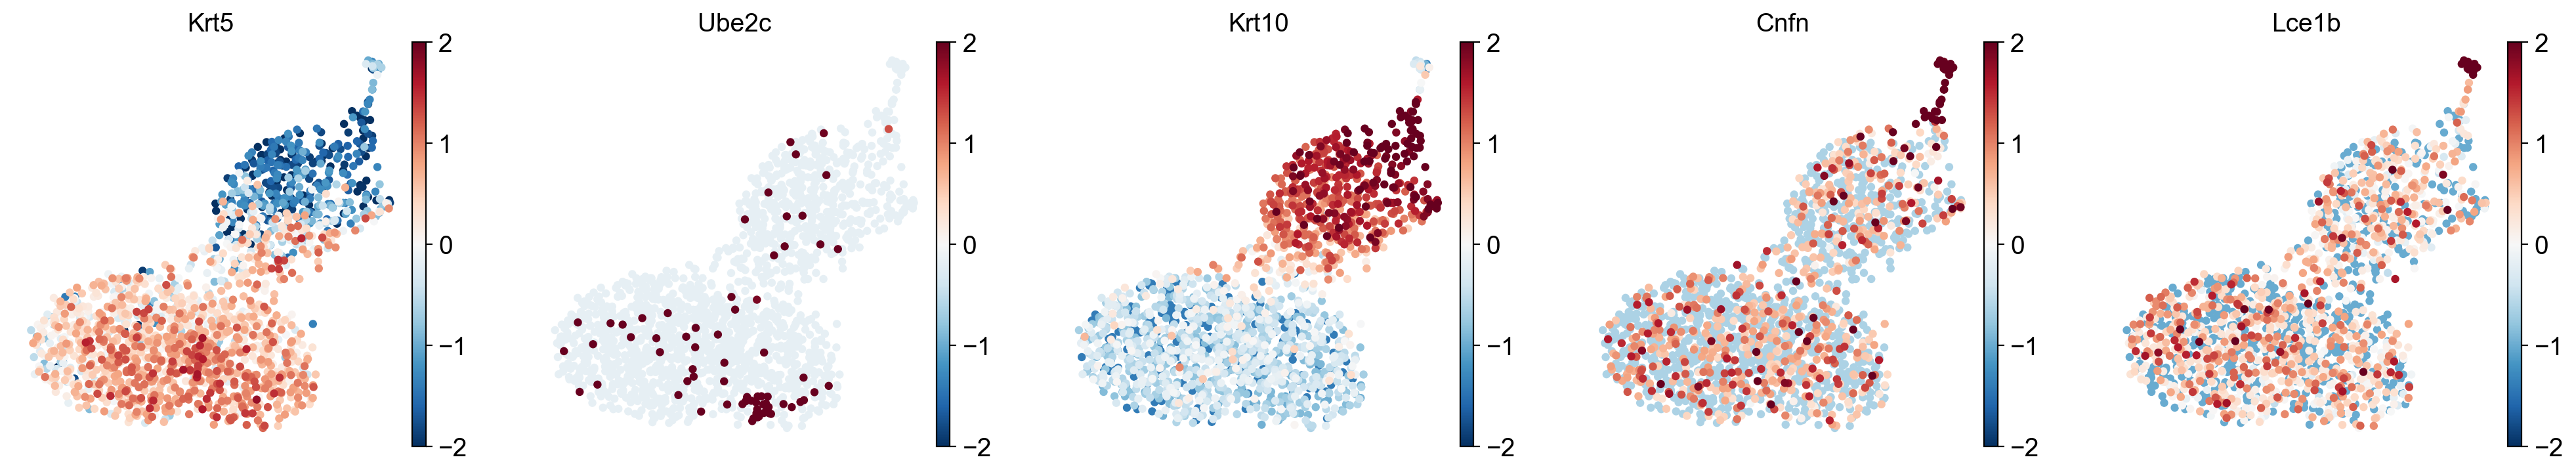

In [27]:
sc.pl.umap(kera_inf, color=['Krt5', 'Ube2c', 'Krt10', 'Cnfn', 'Lce1b'], frameon=False, cmap='RdBu_r', size=80, ncols=5, save='-KC-control.pdf', vmin=-2, vmax=2, layer='scaled')

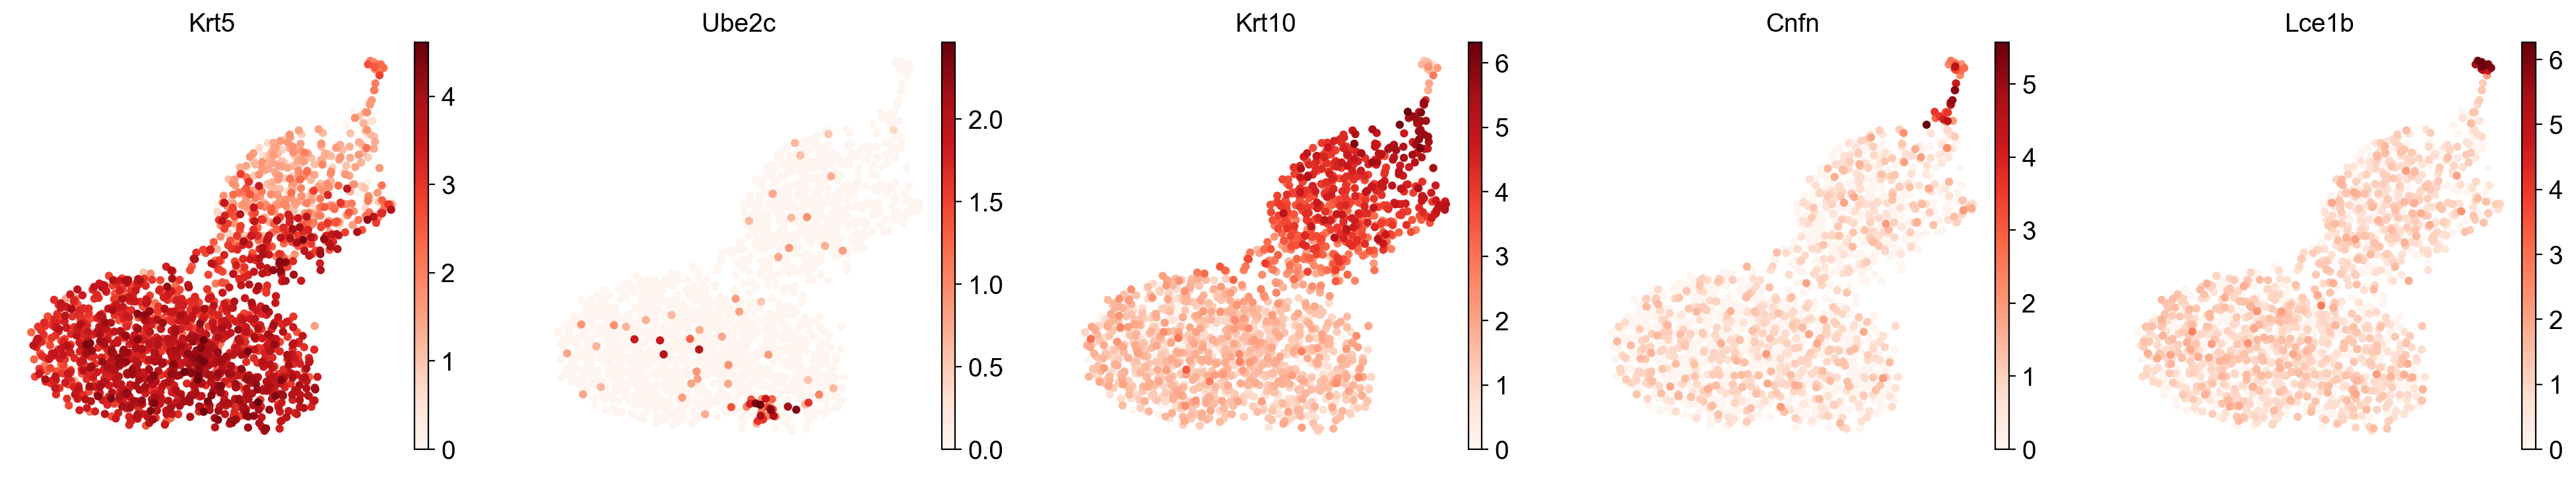

In [21]:
sc.pl.umap(kera_inf, color=['Krt5', 'Ube2c', 'Krt10', 'Cnfn', 'Lce1b'], frameon=False, cmap='Reds', size=80, ncols=5, save='-KC-control.pdf')

In [333]:
run_spring(kera, 'leiden');

/home/gokcen/.miniconda/lib/python3.8/site-packages/scrublet/helper_functions.py:175: RuntimeWarning: divide by zero encountered in true_divide


  0%|          | 0/16 [00:00<?, ?it/s]

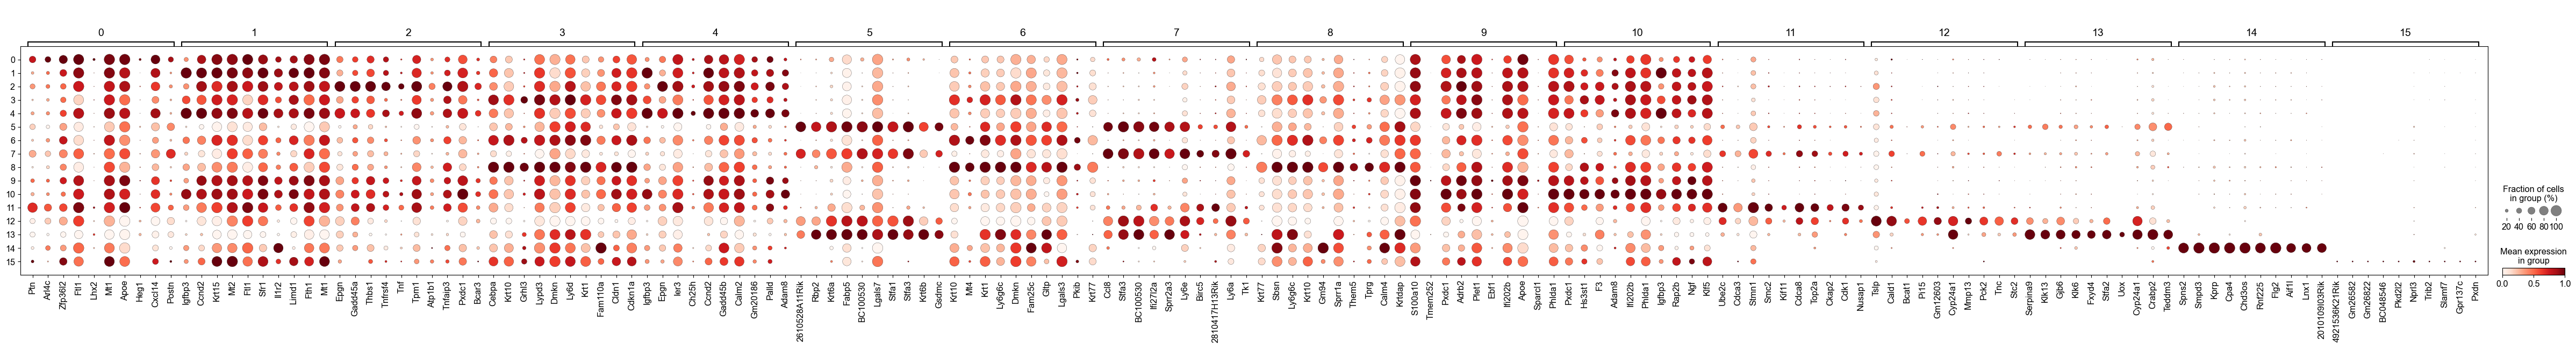

In [335]:
dotplot_spring(kera, 'leiden', mean_only_expressed=True, use_raw=False, standard_scale='var')

In [390]:
kera.obs['Top2a+-'] = ['Top2a+' if x else 'Top2a-' for x in kera.obs_vector('Top2a')>0]
kera._sanitize()
kera.uns['Top2a+-_colors'] = [
    #'#9b59b6',
    '#e74c3c',
    '#3498db',
    #'#95a5a6',
]

... storing 'Top2a+-' as categorical


/home/gokcen/.miniconda/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 8.0 x 0.8 in image.
/home/gokcen/.miniconda/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: figures/barplot-kc-top2a-binary.pdf


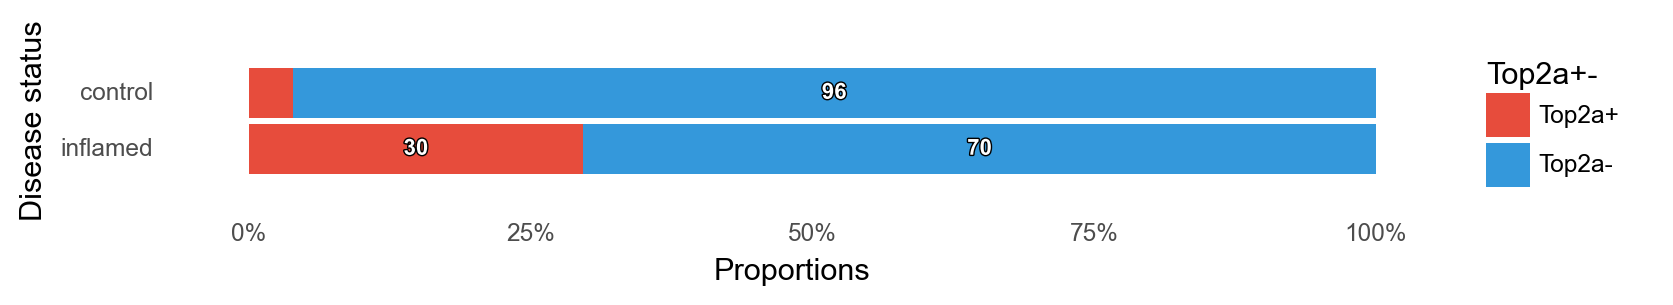

<ggplot: (8780442392203)>

In [393]:
g = plot_proportion_barplot(kera, 'status', 'Top2a+-', yaxis_label='Disease status')
ggsave(g, 'figures/barplot-kc-top2a-binary.pdf')

g

In [428]:
kera.var_names[kera.var_names.str.startswith('Lce')]

Index(['Lce1a1', 'Lce1a2', 'Lce1b', 'Lce1c', 'Lce1d', 'Lce1e', 'Lce1f',
       'Lce1g', 'Lce1h', 'Lce1i', 'Lce1j', 'Lce1k', 'Lce1l', 'Lce1m', 'Lce3c',
       'Lce3d', 'Lce3f', 'Lce6a'],
      dtype='object', name='index')

... storing 'S100a9+-' as categorical
/home/gokcen/.miniconda/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 8.0 x 0.6400000000000001 in image.
/home/gokcen/.miniconda/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: figures/barplot-kc-S100a9-binary.pdf


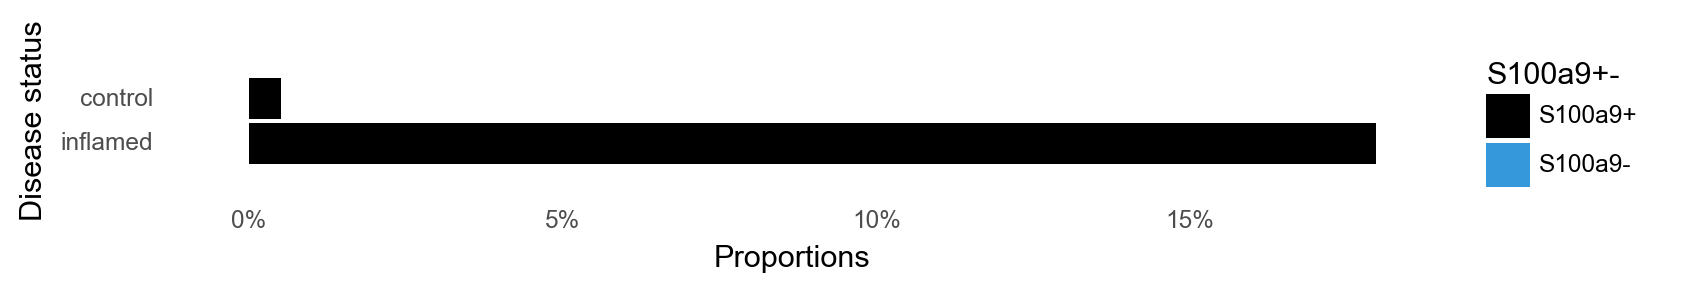

<ggplot: (8768791220580)>

In [23]:
gene = 'S100a9'

kera.obs[f'{gene}+-'] = [f'{gene}+' if x else f'{gene}-' for x in kera.obs_vector(gene)>0]
kera._sanitize()
kera.uns[f'{gene}+-_colors'] = [
    #'#9b59b6',
    '#000000',
    '#3498db',
    #'#95a5a6',
]

g = plot_proportion_barplot(kera, 'status', f'{gene}+-', yaxis_label='Disease status', show_percent=False, fill_groups=[f'{gene}+'], bar_position='stack', height_scale=0.8)
ggsave(g, f'figures/barplot-kc-{gene}-binary.pdf')

g

## Proportions

In [188]:
pd.options.display.max_columns = None

In [189]:
ad_sub.obs

10x_cell_calling  G2M_score   S_score  \
AAACCTGAGACTACAA-1-mouse-inflamed              True  -0.076895 -0.025523   
AAACCTGAGTGTTAGA-1-mouse-inflamed              True   0.123499  0.324776   
AAACCTGCAGCAGTTT-1-mouse-inflamed              True  -0.134818 -0.031025   
AAACCTGCATCCCATC-1-mouse-inflamed             False  -0.144989  0.018973   
AAACCTGCATGTAGTC-1-mouse-inflamed              True   0.599966 -0.068202   
...                                             ...        ...       ...   
TTTGTCAAGTGTACGG-1-mouse-control              False  -0.005189 -0.020556   
TTTGTCACATGCCCGA-1-mouse-control               True  -0.087298 -0.052292   
TTTGTCAGTCTTCTCG-1-mouse-control               True  -0.049314 -0.029828   
TTTGTCAGTGTTTGGT-1-mouse-control               True  -0.079764 -0.008130   
TTTGTCATCAGAGACG-1-mouse-control               True  -0.121508 -0.080113   

                                   barcode_rank  empty_drops_FDR leiden  \
AAACCTGAGACTACAA-1-mouse-inflamed        1972.0         0.000000      9   
AAACCTGAGTGTTAGA-1-mouse-inflamed         744.0         0.000000      1   
AAACCTGCAGCAGTTT-1-mouse-inflamed        2918.0         0.000000      4   
AAACCTGCATCCCATC-1-mouse-inflamed        3943.5         0.000000      4   
AAACCTGCATGTAGTC-1-mouse-inflamed        2018.0         0.000000      1   
...                                         ...              ...    ...   
TTTGTCAAGTGTACGG-1-mouse-control         4757.0         0.000102     21   
TTTGTCACATGCCCGA-1-mouse-control         3848.0         0.000000     20   
TTTGTCAGTCTTCTCG-1-mouse-control         1286.0         0.000000      3   
TTTGTCAGTGTTTGGT-1-mouse-control         1027.0         0.000000      0   
TTTGTCATCAGAGACG-1-mouse-control         3068.0         0.000000      2   

                                   log10_n_genes  log10_n_umis   mt_frac  \
AAACCTGAGACTACAA-1-mouse-inflamed       3.202761      3.811173  0.028885   
AAACCTGAGTGTTAGA-1-mouse-inflamed       3.500785      4.167937  0.027512   
AAACCTGCAGCAGTTT-1-mouse-inflamed       3.202488      3.610873  0.030622   
AAACCTGCATCCCATC-1-mouse-inflamed       3.015360      3.380754  0.029963   
AAACCTGCATGTAGTC-1-mouse-inflamed       3.340444      3.795463  0.029949   
...                                          ...           ...       ...   
TTTGTCAAGTGTACGG-1-mouse-control        2.445604      2.635484  0.037037   
TTTGTCACATGCCCGA-1-mouse-control        3.024075      3.341039  0.039216   
TTTGTCAGTCTTCTCG-1-mouse-control        3.324077      3.901349  0.023720   
TTTGTCAGTGTTTGGT-1-mouse-control        3.350442      3.937267  0.020220   
TTTGTCATCAGAGACG-1-mouse-control        3.049218      3.541330  0.025589   

                                   n_counts  n_genes   n_umis  \
AAACCTGAGACTACAA-1-mouse-inflamed    6286.0     1432   6474.0   
AAACCTGAGTGTTAGA-1-mouse-inflamed   14311.0     2887  14721.0   
AAACCTGCAGCAGTTT-1-mouse-inflamed    3956.0     1440   4082.0   
AAACCTGCATCCCATC-1-mouse-inflamed    2331.0      937   2403.0   
AAACCTGCATGTAGTC-1-mouse-inflamed    6057.0     1989   6244.0   
...                                     ...      ...      ...   
TTTGTCAAGTGTACGG-1-mouse-control      416.0      234    432.0   
TTTGTCACATGCCCGA-1-mouse-control     2106.0      945   2193.0   
TTTGTCAGTCTTCTCG-1-mouse-control     7777.0     1923   7968.0   
TTTGTCAGTGTTTGGT-1-mouse-control     8480.0     2042   8655.0   
TTTGTCATCAGAGACG-1-mouse-control     3387.0     1002   3478.0   

                                   neg_log10_empty_drops_FDR phase  \
AAACCTGAGACTACAA-1-mouse-inflamed                   4.000000    G1   
AAACCTGAGTGTTAGA-1-mouse-inflamed                   4.000000     S   
AAACCTGCAGCAGTTT-1-mouse-inflamed                   4.000000    G1   
AAACCTGCATCCCATC-1-mouse-inflamed                   4.000000     S   
AAACCTGCATGTAGTC-1-mouse-inflamed                   4.000000   G2M   
...                                                      ...   ...   
TTTGTCAAGTGTACGG-1-mouse-control     

/home/gokcen/.miniconda/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 8.0 x 0.6400000000000001 in image.
/home/gokcen/.miniconda/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: figures/barplot-status-vs-coarse.pdf


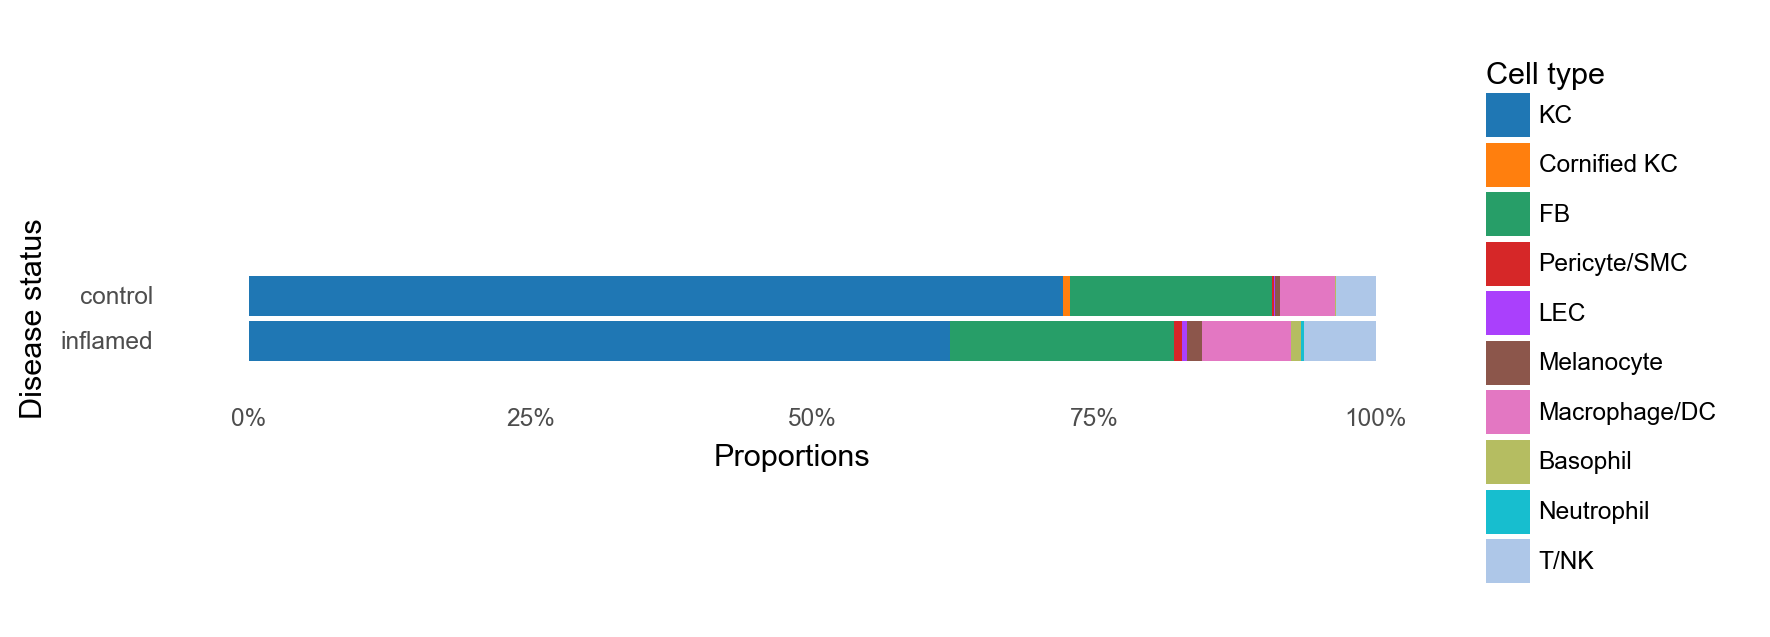

<ggplot: (8779679669224)>

In [381]:
g = plot_proportion_barplot(ad, 'status', 'Cell type', yaxis_label='Disease status', height_scale=0.8, show_percent=False)
ggsave(g, 'figures/barplot-status-vs-coarse.pdf')

g

In [363]:
ad.obs.status.value_counts()

inflamed    4713
control     4420
Name: status, dtype: int64

/home/gokcen/.miniconda/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 8.0 x 2.8 in image.
/home/gokcen/.miniconda/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: figures/barplot-coarse-vs-status.pdf


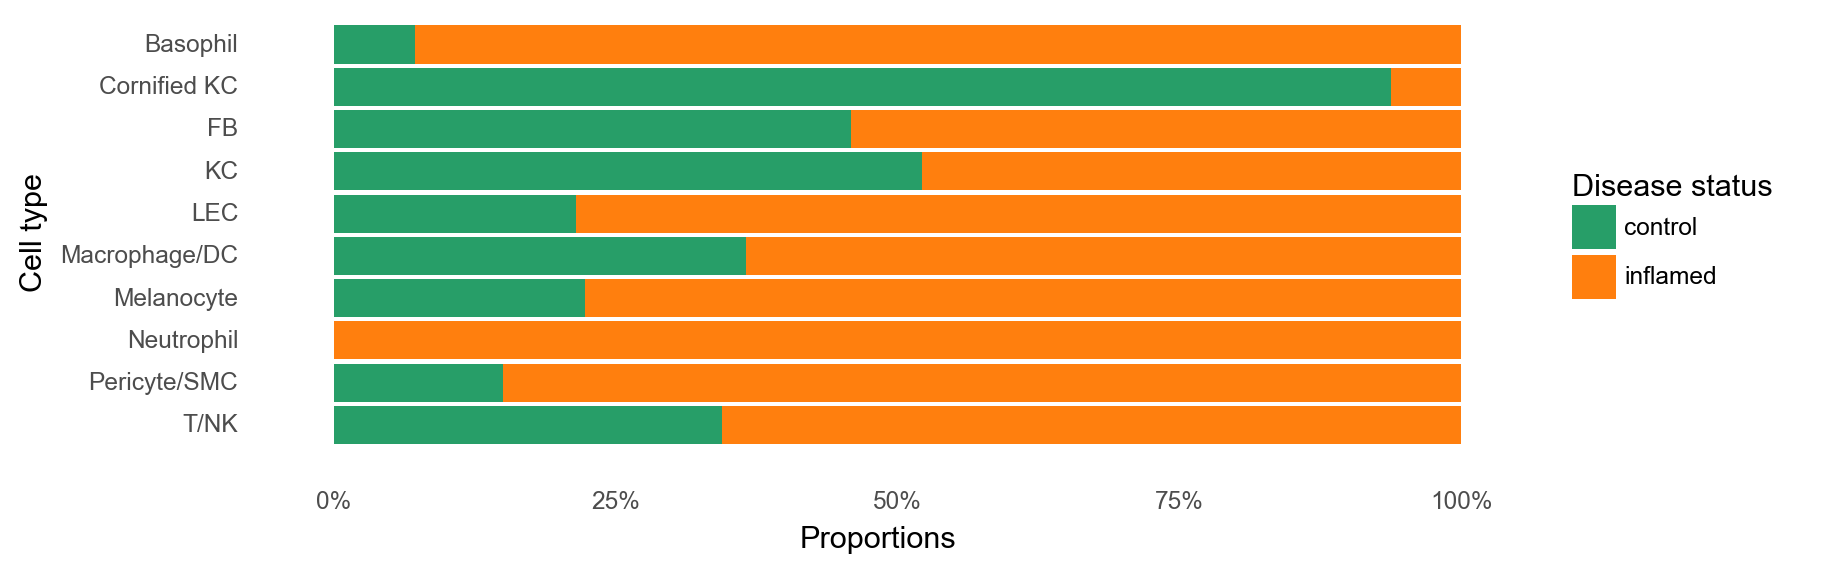

<ggplot: (8767020201825)>

In [79]:
g = plot_proportion_barplot(ad, 'Cell type', 'status', fill_label='Disease status', height_scale=0.7, show_percent=False)
ggsave(g, 'figures/barplot-coarse-vs-status.pdf')

g